In [9]:
import pandas as pd
from ase.units import GPa
from calorine.nep import get_parity_data, read_loss, read_structures
from matplotlib import pyplot as plt
from pandas import DataFrame, concat as pd_concat
from sklearn.metrics import r2_score, mean_squared_error

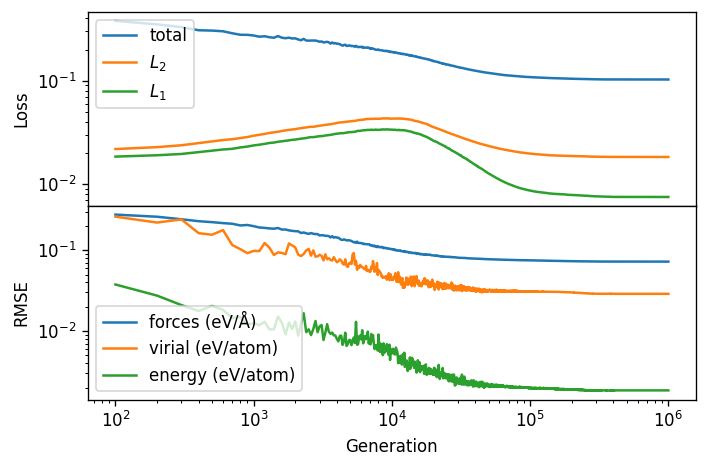

In [10]:
loss = read_loss('models/nepmodel_HSE/loss.out')

fig, axes = plt.subplots(figsize=(6.0, 4.0), nrows=2,sharex=True, dpi=120)

ax = axes[0]
ax.set_ylabel('Loss')
ax.plot(loss.total_loss, label='total')
ax.plot(loss.L2, label='$L_2$')
ax.plot(loss.L1, label='$L_1$')
ax.set_yscale('log')
ax.legend()

ax = axes[1]
ax.plot(loss.RMSE_F_train, label='forces (eV/Å)')
ax.plot(loss.RMSE_V_train, label='virial (eV/atom)')
ax.plot(loss.RMSE_E_train, label='energy (eV/atom)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Generation')
ax.set_ylabel('RMSE')
ax.legend()

plt.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)
fig.align_ylabels(axes)
fig.savefig('figs/loss_curves.png')


##### note here that I've ignored all the large values that NEP prints for structures that do not have the stress tensore calculated

/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated i

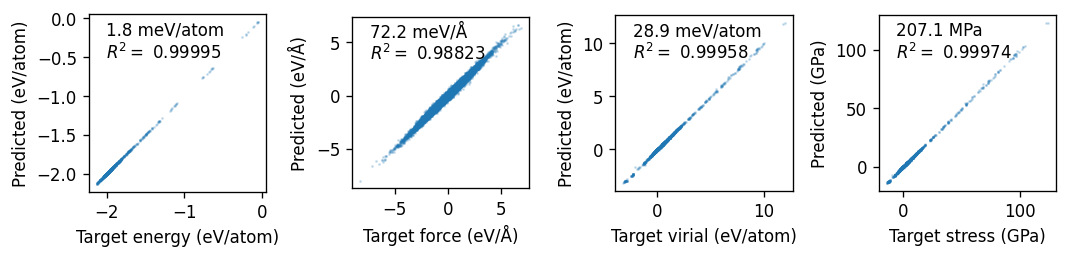

In [11]:
training_structures, _ = read_structures('models/nepmodel_HSE')

units = dict(
    energy='eV/atom',
    force='eV/Å',
    virial='eV/atom',
    stress='GPa',
)

fig, axes = plt.subplots(figsize=(9.0, 2.6), ncols=4, dpi=120)
kwargs = dict(alpha=0.2, s=0.5)

for icol, (prop, unit) in enumerate(units.items()):
    df = get_parity_data(training_structures, prop, flatten=True)
    df = df[df>-100000].dropna()
    R2 = r2_score(df.target, df.predicted)
    rmse = mean_squared_error(df.target, df.predicted, squared=False)

    ax = axes[icol]
    ax.set_xlabel(f'Target {prop} ({unit})')
    ax.set_ylabel(f'Predicted ({unit})')
    ax.scatter(df.target, df.predicted, **kwargs)
    ax.set_aspect('equal')
    mod_unit = unit.replace('eV', 'meV').replace('GPa', 'MPa')
    ax.text(0.1, 0.75, f'{1e3*rmse:.1f} {mod_unit}\n' + '$R^2= $' + f' {R2:.5f}', transform=ax.transAxes)

fig.tight_layout()
fig.savefig('figs/parity_plots.png')